In [71]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./core/Appearances.csv')

In [32]:
pd.options.display.max_columns = None

In [33]:
df.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0


In [34]:
df.shape

(105789, 21)

In [35]:
df.describe()

,yearID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
count,105789.000000,105789.000000,96020.000000,105789.000000,98091.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,105789.000000,103718.000000,96020.000000,96020.000000
mean,1965.792738,51.260216,37.063466,48.187874,46.532740,10.460870,4.702408,4.563556,4.546787,4.562015,4.529715,4.817977,4.547278,4.677915,13.722372,1.148248,4.355936,0.788419
std,39.307183,47.062176,47.174315,48.874759,45.341563,17.045507,18.858435,20.644492,20.386323,20.240987,21.081530,18.934475,20.119311,19.234311,34.606725,8.075065,8.882526,2.487016
min,1871.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1935.000000,13.000000,1.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1975.000000,34.000000,16.000000,31.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2000.000000,80.000000,55.000000,80.000000,68.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000
max,2018.000000,165.000000,164.000000,165.000000,165.000000,106.000000,160.000000,162.000000,163.000000,164.000000,165.000000,163.000000,162.000000,162.000000,164.000000,162.000000,109.000000,92.000000


In [36]:
df.dtypes

yearID         int64
teamID        object
lgID          object
playerID      object
G_all          int64
GS           float64
G_batting      int64
G_defense    float64
G_p            int64
G_c            int64
G_1b           int64
G_2b           int64
G_3b           int64
G_ss           int64
G_lf           int64
G_cf           int64
G_rf           int64
G_of           int64
G_dh         float64
G_ph         float64
G_pr         float64
dtype: object

In [37]:
df.isnull().sum()

yearID          0
teamID          0
lgID          737
playerID        0
G_all           0
GS           9769
G_batting       0
G_defense    7698
G_p             0
G_c             0
G_1b            0
G_2b            0
G_3b            0
G_ss            0
G_lf            0
G_cf            0
G_rf            0
G_of            0
G_dh         2071
G_ph         9769
G_pr         9769
dtype: int64

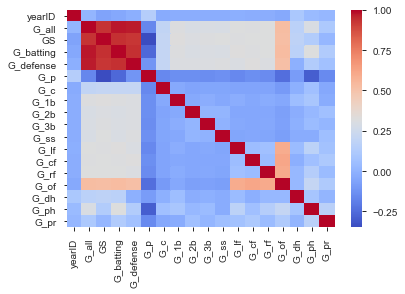

In [38]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [39]:
df._get_numeric_data().head()

,yearID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,1,1.0,1,1.0,0,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,25,25.0,25,25.0,0,0,0,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,29,29.0,29,29.0,0,0,0,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,27,27.0,27,27.0,0,27,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,25,25.0,25,25.0,0,5,1,2,20,0,1,0,0,1,0.0,0.0,0.0


In [40]:
pp.ProfileReport(df)

In [41]:
cubs_16 = df[(df['teamID'] == 'CHN') & (df['yearID'] == 2016)]

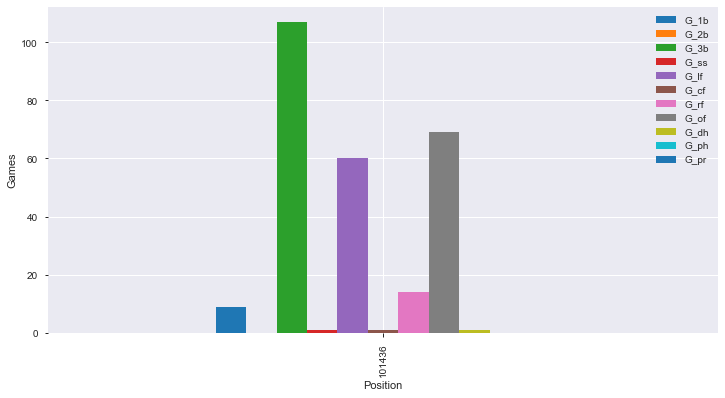

In [74]:
cubs_16[cubs_16['playerID'] =='bryankr01'][['G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf',
       'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr']].plot(kind='bar', figsize=(12,6))

plt.xlabel('Position')
plt.ylabel('Games');

In [56]:
cubs_16.columns

Index(['yearID', 'teamID', 'lgID', 'playerID', 'G_all', 'GS', 'G_batting',
       'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf',
       'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr'],
      dtype='object')

In [62]:
cubs_16['playerID'].value_counts()

schwaky01    1
bryankr01    1
lackejo01    1
montgmi01    1
stroppe01    1
concege01    1
coghlch01    1
almoral01    1
rizzoan01    1
rossda01     1
matusbr01    1
solerjo01    1
arrieja01    1
baezja01     1
heywaja01    1
buchaja01    1
nathajo01    1
warread01    1
peraljo01    1
kawasmu01    1
federti01    1
candeje01    1
smithjo05    1
chapmar01    1
grimmju01    1
zastrro01    1
edwarca01    1
ramirne01    1
zobribe01    1
woodtr01     1
montemi01    1
hammeja01    1
russead02    1
cahiltr01    1
lasteto01    1
penafe01     1
kalisry01    1
fowlede01    1
hendrky01    1
szczuma01    1
contrwi01    1
pattosp01    1
richacl01    1
rondohe01    1
lestejo01    1
Name: playerID, dtype: int64

In [66]:
cubs_16[cubs_16['G_p'] >= 1]

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,G_1b,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
101334,2016,CHN,NL,arrieja01,31,31.0,27,31.0,31,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
101437,2016,CHN,NL,buchaja01,2,1.0,2,2.0,2,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
101462,2016,CHN,NL,cahiltr01,51,1.0,49,50.0,50,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0
101507,2016,CHN,NL,chapmar01,28,0.0,26,28.0,28,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
101545,2016,CHN,NL,concege01,3,0.0,3,3.0,3,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
101651,2016,CHN,NL,edwarca01,37,0.0,34,36.0,36,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0
101815,2016,CHN,NL,grimmju01,68,0.0,64,68.0,68,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
101834,2016,CHN,NL,hammeja01,35,30.0,35,30.0,30,0,0,0,0,0,0,0,0,0,0.0,5.0,0.0
101863,2016,CHN,NL,hendrky01,32,30.0,30,31.0,31,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0
102003,2016,CHN,NL,lackejo01,29,29.0,28,29.0,29,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
